# Lab 07 assignment (20 pts)

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean, Eric Gagliano, Quinn Brencher

## Introduction

### Objectives
* Introduce xarray data model for N-d array analysis
* Practice basic N-d array slicing, grouping and aggregation
* Explore global and local climate reanalysis data

### Instructions  
- For each question or task below, write some code in the empty cell and execute to preserve your output 
- If you are in the graduate section of the class, please complete the challenge questions
- Work together, consult resources we've discussed, post on slack!

## Part 0: Imports and filenames
### First, let's import the libraries we'll need. Make sure to shut down any other kernels you have running!

In [1]:
import os
from glob import glob
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import holoviews as hv
import hvplot.xarray 
import rioxarray
from pathlib import Path
import ee
import pyproj

In [2]:
era5_data_dir = f'{Path.home()}/gda_demo_data/era5_data'

In [3]:
# If you see no output for this cell, run the Jupyterbook demo notebook to query download data
!ls -lh $era5_data_dir

total 2.1G
-rw-r--r-- 1 eric eric 2.0G Feb 18 19:00 1month_anomaly_Global_ea_2t.nc
-rw-r--r-- 1 eric eric  48M Feb 18 18:58 climatology_0.25g_ea_2t.nc


## Part 1: Global climatology (7 pts)

### Monthly temperature from 1979-2021
* Two datasets are provided:
    1. Climatology - long-term mean monthly values from 1979-2021 (12 grids)
    2. Anomaly - monthly difference from long-term monthly mean (505 grids from 1979-2021)
* See [here](https://cds.climate.copernicus.eu/cdsapp#!/dataset/ecv-for-climate-change?tab=overview) for more details on the datasets 
* Check out the download notebook for more information on how we prepared this data for you

### Open the processed global monthly temperature anomaly and climatology NetCDF files

In [4]:
clim_fn = os.path.join(era5_data_dir, 'climatology_0.25g_ea_2t.nc')
clim_ds = xr.open_dataset(clim_fn)

In [5]:
anom_fn = os.path.join(era5_data_dir, '1month_anomaly_Global_ea_2t.nc') 
anom_ds = xr.open_dataset(anom_fn, chunks='auto')

### Inspect the xarray Datasets
* Discuss with your neighbor
* Review the output when you just type the DataSet name (similar to output from the `info()` method)
* Note the number of time entries in each DataSet
* What are the min and max longitude, min and max latitude
* Note: The timestamp listed in the climatology dataset for each month is arbitrarily listed as 1981 (e.g., '1981-01-01')
    * Remember these are mean values for each month of the year (12 total) across the entire 1979-2021 period
* print info for the 't2m' DataArray (temperature 2 m above ground)

In [6]:
clim_ds

<xarray.Dataset> Size: 50MB
Dimensions:    (time: 12, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 96B 1981-01-01 1981-02-01 ... 1981-12-01
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    t2m        (time, latitude, longitude) float32 50MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T07:58 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
anom_ds

<xarray.Dataset> Size: 2GB
Dimensions:    (time: 517, latitude: 721, longitude: 1440)
Coordinates:
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2022-01-01
  * latitude   (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Data variables:
    t2m        (time, latitude, longitude) float32 2GB dask.array<chunksize=(205, 286, 571), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-02-28T07:59 GRIB to CDM+CF via cfgrib-0.9.1...

#### *Written response: In your own words, briefly describe each dataset and what it might be used for. What are the data variables, and what is their data type? Please also note the spacing, min, and max of each coordinate for each dataset. What do you think `chunks='auto'` did in the open dataset call, and what might be its implications?*

**STUDENT WRITTEN RESPONSE HERE**

#### *Convert the temperature values from K to C for the climatology dataset*
* Note: don't need to do this for anomalies, as they are relative values, not absolute
* These operations are done on the DataArray level (not the top-level Dataset object level), so you'll need to modify `clim_ds['t2m']`
* Make sure you also update the units metadata attribute
    * The units used by xarray are stored in the clim_ds['t2m'].attrs dictionary
    * There is also a GRIB units variable, but this is holdover from the grib to xarray conversion--update it anyway!
* Check `.attrs` to make sure the attributes have been updated
* Caution: Using `clim_ds['t2m'] = clim_ds['t2m'] - 273.15` will remove the attributes, use `clim_ds['t2m'] -= 273.15` which does an in-place operation instead

In [8]:
# STUDENT CODE HERE

In [9]:
# STUDENT CODE HERE

{'GRIB_paramId': np.int64(167),
 'GRIB_dataType': 'an',
 'GRIB_numberOfPoints': np.int64(1038240),
 'GRIB_typeOfLevel': 'surface',
 'GRIB_stepUnits': np.int64(1),
 'GRIB_stepType': 'avgua',
 'GRIB_gridType': 'regular_ll',
 'GRIB_NV': np.int64(0),
 'GRIB_Nx': np.int64(1440),
 'GRIB_Ny': np.int64(721),
 'GRIB_cfName': 'unknown',
 'GRIB_cfVarName': 't2m',
 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid',
 'GRIB_iDirectionIncrementInDegrees': np.float64(0.25),
 'GRIB_iScansNegatively': np.int64(0),
 'GRIB_jDirectionIncrementInDegrees': np.float64(0.25),
 'GRIB_jPointsAreConsecutive': np.int64(0),
 'GRIB_jScansPositively': np.int64(0),
 'GRIB_latitudeOfFirstGridPointInDegrees': np.float64(90.0),
 'GRIB_latitudeOfLastGridPointInDegrees': np.float64(-90.0),
 'GRIB_longitudeOfFirstGridPointInDegrees': np.float64(0.0),
 'GRIB_longitudeOfLastGridPointInDegrees': np.float64(359.75),
 'GRIB_missingValue': np.int64(9999),
 'GRIB_name': '2 metre temperature',
 'GRIB_shortName': '2t',
 'G

#### *Check that these values seem reasonable with a quick plot of the May slice using `isel()`*
* Review different strategies for selection here: http://xarray.pydata.org/en/stable/indexing.html
* Try the `isel` method with dimension name and integer index (e.g., `time=7`)
* In the next step, you can use the `sel` method with dimension name and label (e.g., `time='2016-08-01'`, though the year may be different in your dataset)
* Note: the xarray convenience `plot.imshow()` is much more efficient for regular grids than the default `plot()`, which uses `contourf` to interpolate values not on a regular grid
    * See the note here: https://xarray-test.readthedocs.io/en/latest/plotting.html#two-dimensions
* Try the `robust=True` option

In [10]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology.png" width="500">

### Set the longitude values to be (-180 to 180) instead of (0 to 360)
* Could also store as new set of coordinates called `longitude_180` or something

In [11]:
def ds_swaplon(ds):
    return ds.assign_coords(longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [12]:
clim_ds = ds_swaplon(clim_ds)
anom_ds = ds_swaplon(anom_ds)

In [13]:
clim_ds.longitude

<xarray.DataArray 'longitude' (longitude: 1440)> Size: 12kB
array([-180.  , -179.75, -179.5 , ...,  179.25,  179.5 ,  179.75])
Coordinates:
  * longitude  (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8

#### *Now replot the May slice using `.sel()`*

In [14]:
#See time dimension index
clim_ds.time

<xarray.DataArray 'time' (time: 12)> Size: 96B
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', '1981-04-01T00:00:00.000000000',
       '1981-05-01T00:00:00.000000000', '1981-06-01T00:00:00.000000000',
       '1981-07-01T00:00:00.000000000', '1981-08-01T00:00:00.000000000',
       '1981-09-01T00:00:00.000000000', '1981-10-01T00:00:00.000000000',
       '1981-11-01T00:00:00.000000000', '1981-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 96B 1981-01-01 1981-02-01 ... 1981-12-01
Attributes:
    long_name:      initial time of forecast
    standard_name:  forecast_reference_time

In [15]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_isel.png" width="500">

#### *Create a plot for May, overlaying coastlines with cartopy*
Use a simple PlateCaree() projection as in example here:
* https://scitools.org.uk/cartopy/docs/v0.15/matplotlib/intro.html

Once you have your axes setup, you should be able to plot with xarray easily (pass the axes object to `plot()` function:
* http://xarray.pydata.org/en/stable/plotting.html#maps  

Note how 2-m temperature varies with elevation (e.g., see the Tibetan Plateau)

In [16]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_cartopy_map.png" width="500">

#### *Create another cartopy plot for May, this time with an Orthographic projection centered on Seattle. Add dashed lines to indicate the center.*

In [17]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_isel_cartopy_map_ortho_seattle.png" width="500">

#### *Create a Facet plot showing temperature grids for each month in the climatology Dataset*
* http://xarray.pydata.org/en/stable/plotting.html#faceting
* Note that these plots can be memory hungry, and if you have other kernels running, this could fill RAM and cause kernel to stop
    * Could try isolating a smaller area to test (see slicing) then running on full dataset when satisfied
* Make sure your units are correct in the colorbar
* Note that xarray uses a different definition of `aspect` than matplotlib
    * https://docs.xarray.dev/en/stable/user-guide/plotting.html#controlling-the-figure-size
    * Since we have 360° of longitude and 180° of latitude, an aspect of 2 should work well here
* While they may look similar, each panel is slightly different
    * Take a moment to admire this, look at seasonal cycles

In [18]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_time_series.png" width="1000">

#### *Now create a facetgrid plot in the Robinson projection and add coastlines*
- Look at the second example in the xarray [Maps documentation](https://docs.xarray.dev/en/stable/user-guide/plotting.html#maps) for inspiration

In [19]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_time_series_map.png" width="1000">

### Create an interactive plot with hvplot()
* Multiple plotting backends can be used with xarray
    * We previously used Seaborn, and folium/ipyleaflet for interactive maps
* Still under development, but `hvplot` is flexible and powerful:
    * https://holoviz.org/
    
* Note how coordinates and values are interactively displayed as you move your cursor over the plot
* Experiment with time slider on right side
* Experiment with zoom/pan capability

In [20]:
#clim_ds['t2m'].hvplot(x='longitude',y='latitude', cmap='RdBu_r', clim=(-50,50))

#### *Written response: Using the interactive plot, what is the average 2 meter air temperature for Seattle in December?*

**STUDENT WRITTEN RESPONSE HERE**

### Reprojecting with rioxarray
* Those visualizations are nice, especially with cartopy when we can specify the projection of the axes. However, this is just for visualization, the actual dataset hasn't been reprojected. This will be a problem for further analysis...
    * The netcdf files have equally spaced grid points every 0.25° of latitude and longitude, which means we are oversampling in the polar regions
        * Think back to Lab04 about the true distance covered by 0.25° degree of longitude near the pole (close to 0 m) vs 0.25° of longitude near the equator (~28 km)
        * The default Plate Carrée "projection" (cylindrical equidistant) for lat/lon data is fine for quick visualization, but it distorts area, especially in the polar regions
    * If we compute mean or other statistics without accounting for this, our results will be biased, incorrectly weigthing the polar regions
* Fortunately, we can use `rioxarray` to quickly reproject into an equal-area projection for these calculations
    * First need to assigning a crs to the xarray dataset
    * Can then use `xds.rio.reproject()`
    * https://corteva.github.io/rioxarray/stable/examples/reproject.html
* Caveat: The better way to do this would be to use the original Gaussian grid from the model, but since we have the netCDF data on regular grid, let's just work with those

In [21]:
#Set CRS of the original xarray Datasets
clim_ds.rio.write_crs('EPSG:4326', inplace=True);
anom_ds.rio.write_crs('EPSG:4326', inplace=True);

In [22]:
print(clim_ds.spatial_ref)

<xarray.DataArray 'spatial_ref' ()> Size: 8B
array(0)
Coordinates:
    spatial_ref  int64 8B 0
Attributes:
    crs_wkt:                      GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...
    semi_major_axis:              6378137.0
    semi_minor_axis:              6356752.314245179
    inverse_flattening:           298.257223563
    reference_ellipsoid_name:     WGS 84
    longitude_of_prime_meridian:  0.0
    prime_meridian_name:          Greenwich
    geographic_crs_name:          WGS 84
    horizontal_datum_name:        World Geodetic System 1984
    grid_mapping_name:            latitude_longitude
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...


#### *Reproject to the Mollweide projection using rioxarray. For January, plot the lat/lon data next to the reprojected Mollweide data.*

In [23]:
#Cylindrical equal area
ea_proj = '+proj=cea +lat_ts=45'
#Equal Earth (not working correctly)
ea_proj = '+proj=eqearth'
#Mollweide
ea_proj = '+proj=moll'
#ea_proj = 'EPSG:6933'

In [24]:
# STUDENT CODE HERE

In [25]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_reproject.png" width="1000">

#### *For both projections, compare the global mean temperature values for January, July, and the entire year.*

In [26]:
# STUDENT CODE HERE

Global mean temperature for January calculated in lat/lon: 3.53C
Global mean temperature for January calculated in equal-area projection: 12.25C


In [27]:
# STUDENT CODE HERE

Global mean temperature for July calculated in lat/lon: 7.78C
Global mean temperature for July calculated in equal-area projection: 16.06C


In [28]:
# STUDENT CODE HERE

Global mean temperature for the entire year calculated in lat/lon: 5.21C
Global mean temperature for the entire year calculated in equal-area projection: 14.18C


* Much closer to expected value of 13.9° for 20th Century (https://www.ncei.noaa.gov/access/monitoring/monthly-report/global/)
* Remember that our dataset is for 1979-2022 period, so we actually expect it to be slightly warmer than the average for the 1900-2000 period

#### *Create line plot of global monthly temperature*
* Compute the mean of the reprojected climatology t2m DataArray across the spatial dimensions (both x and y)
* Remember to pass the appropriate `dim=(...)` to `mean()` so xarray knows over which dimensions to compute the mean!)

In [29]:
#Not this! Gives a single value for full array
#clim_da.mean()

In [30]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_global_mean.png" width="1000">

#### *Create 2D plot showing mean temperature vs. latitude (averaged over all longitudes)*

In [31]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_global_mean_lat.png" width="1000">

#### *Written response: Based on your plot, which latitudes experience the "strongest seasons"?*

**STUDENT WRITTEN RESPONSE HERE**

#### *Create line plots of mean zonal and meridional temperature*
* https://en.wikipedia.org/wiki/Zonal_and_meridional
* Hint: specify a tuple of appropriate dimensions for the `dim` keyword when computing `mean()`
    * Above we used `dim=('latitude', 'longitude')` / `dim=('x', 'y')` to average all latitudes and longitudes / x and y values, plotting the resulting values over time
    * Now in the zonal mean case, we want to average for all latitudes and times, plotting resulting values vs. longitude
* Create as figure with two subplots: meridional mean T and zonal mean T
* Add titles accordingly

In [32]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_zonal_meridional_mean.png" width="1000">

### Create a plot showing monthly mean temperature for the Arctic and Antarctic
* See location indexing here: http://xarray.pydata.org/en/stable/indexing.html#assigning-values-with-indexing
* One approach:
    * Create boolean index arrays for `clim_ds['latitude']` coordinate for relevant latitude ranges
        * Use Arctic circle and Antarctic circle as a threshold
            * https://en.wikipedia.org/wiki/Arctic_Circle
    * Use the index array with xarray `where` method on the `clim_ds['t2m']` DataArray
        * Make sure to use `drop=True` to avoid unnecessarily storing lots of nan values in memory
    * Compute the mean across all returned lat/lon grid cells
* Note the magnitude and phase of the seasonal temperature varability at the opposite poles

In [33]:
polar_lat = 66.5 #degrees

#### Convert polar circle latitude to y-coordinate for equal area projection

In [34]:
#Compute y coordinate of polar circle latitude
from pyproj import CRS, Transformer
transformer = Transformer.from_crs(CRS.from_epsg(4326), CRS.from_proj4(ea_proj))
polar_y = transformer.transform(polar_lat, 0)[-1]
polar_y

7474236.788842151

In [35]:
arctic_idx = (clim_da['y'] >= polar_y)
antarctic_idx = (clim_da['y'] <= -polar_y)
nonpolar_idx = (clim_da['y'] < polar_y) & (clim_da['y'] > -polar_y)

In [36]:
#Confidence check
#arctic_idx[::10]
#antarctic_idx[::10]
#nonpolar_idx[::10]

In [37]:
kwargs = dict(cmap='RdBu_r', vmin=-50, vmax=50)

#### *Plot the global mean temperature, with seperate plots for the three regions (arctic, non-polar, antarctic)*

In [38]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_polar_means.png" width="1000">

#### *Plot the average temperature for each month for the entire globe, arctic, antarctic, and non-polar seperately*

In [39]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_polar_means_line.png" width="1000">

#### *Challenge question: Repeat the above analysis, isolating land and ocean classes* (GS: Attempt required / UG: +1 pts)
* Hint: can use `rioxarray` for clipping using a GeoDataFrame or geometry, perhaps using the world polygons we've used before


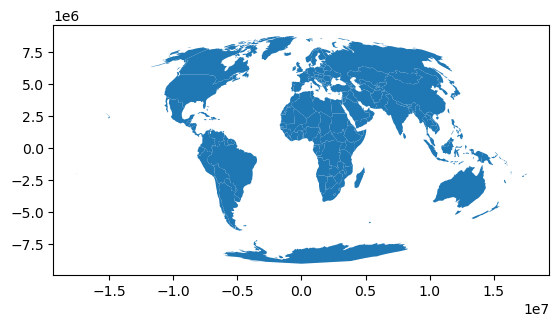

In [40]:
world = gpd.read_file("https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip")
world = world.to_crs(ea_proj)
world.plot();

In [41]:
# STUDENT CODE HERE

In [42]:
# STUDENT CODE HERE

In [43]:
# STUDENT CODE HERE

<img src="imgs/era5_may_climatology_land_ocean_means.png" width="1000">

In [44]:
# STUDENT CODE HERE

<img src='imgs/era5_may_climatology_land_ocean_means_line.png' width="1000">

#### *Written response: Describe some insights from splitting each zone into its land and ocean components*

**STUDENT WRITTEN RESPONSE HERE**

## Part 2: Global temperature variability from 1979-present (6 pts)

Can we see evidence of climate change in reanalysis datasets? Let's check.

To do this, we will use the monthly anomalies from 1979-present, contained in the `anom_ds` Dataset

In [45]:
#Reproject anomaly dataset to equal area projection
#This temporarily requires ~6 GB RAM
anom_da = anom_ds['t2m'].rio.reproject(ea_proj)

#### *Create a line plot of mean global monthly temperature anomaly from 1979-present*
* Note: if you used xarray's default lazy load of the `nc` file, and this is the first time reading the entire `anom_ds` from disk, this may take ~20 seconds

In [46]:
# STUDENT CODE HERE

In [47]:
# STUDENT CODE HERE

<img src='imgs/era5_anomaly_global_mean.png' width="1000">

#### *Did the Arctic and Antarctic warm at the same rate over the past 40 years?*
* Create a line plot showing anomalies for each region, you can reuse indices from above

In [48]:
# STUDENT CODE HERE

In [49]:
# STUDENT CODE HERE

In [50]:
# STUDENT CODE HERE

In [51]:
# STUDENT CODE HERE

<img src='imgs/era5_anomaly_polar_means_line.png' width="1000">

#### *Compute linear temperature trend at each pixel and create a map with coastlines*
* Note: can coarsen the data to 1x1° to improve performance (16x!)
* See the xarray `polyfit` function: https://docs.xarray.dev/en/stable/generated/xarray.DataArray.polyfit.html
    * A linear fit is degree 1
    * This will return two coefficients (m and b in y=mx+b), so we want to consider m here

In [52]:
anom_ds.dims

FrozenMappingWarningOnValuesAccess({'time': 517, 'latitude': 721, 'longitude': 1440})

In [53]:
ds_factor=4
anom_ds_1deg = anom_ds.coarsen(latitude=ds_factor, longitude=ds_factor, boundary='trim').mean()

In [54]:
anom_ds_1deg.dims

FrozenMappingWarningOnValuesAccess({'time': 517, 'latitude': 180, 'longitude': 360})

In [55]:
#The difference along the time axis will return values in degrees C per timedelta64[ns] - nanoseconds
#We want degrees C per year
#Conversion factor from nanoseconds to year
dt_factor = 1E9 * (60*60*24*365.25)

In [56]:
# STUDENT CODE HERE

In [57]:
# STUDENT CODE HERE

In [58]:
years = pd.DatetimeIndex(anom_ds_1deg.time.values).year

In [59]:
# STUDENT CODE HERE

<img src='imgs/era5_anomaly_trend_map.png' width="1000">

#### *Written response: From 1979 to 2022, what general trends do you see? Where is warming greatest? Where is cooling greatest? Why might you prefer this plot over the global line plot?*

**STUDENT WRITTEN RESPONSE HERE**

## Part 3: Analyze WA snow depth with ERA5 Land daily data (7 pts)

Now we'll look at the [ERA5 Land product](https://www.ecmwf.int/en/era5-land), which is a higher resolution 9km dataset. We'll use the [daily averages of the temperature and snow depth variables hosted on Google Earth Engine](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_DAILY_AGGR), and we'll pull them down dynamically from Google Earth Engine using the [Google Earth Engine Python API](https://developers.google.com/earth-engine/guides/python_install) and [Xee](https://xee.readthedocs.io/en/latest/index.html). We will focus on [water year](https://water.usgs.gov/nwc/explain_data.html) 2021.

### Get the WA state outline

In [60]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json'
states_gdf = gpd.read_file(states_url)
wa_state_gdf = states_gdf.loc[states_gdf['NAME'] == 'Washington']
wa_state_gdf

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
14,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-123.09055 49.00198, -123.0353..."


### We'll use this helper function to abstract away most of the data download complexities

In [61]:
def get_era5_land_daily(
    bbox_gdf: gpd.GeoDataFrame | None = None,
    start_date: str | None = None,
    end_date: str | None = None,
    variables: str | list | None = None,
) -> xr.Dataset:
    """
    ERA5-Land reanalysis data for a given bounding box and time period.

    Description:
    ERA5 is the fifth generation ECMWF atmospheric reanalysis of the global climate.
    ERA5 provides hourly estimates of many atmospheric, land-surface and sea-state parameters.

    Parameters
    ----------
    bbox_gdf : geopandas.GeoDataFrame or tuple or shapely.Geometry, optional
        GeoDataFrame containing the bounding box, or a tuple of (xmin, ymin, xmax, ymax), or a Shapely geometry.
    start_date : str, optional
        Start date in 'YYYY-MM-DD' format. If None, uses earliest available date.
    end_date : str, optional
        End date in 'YYYY-MM-DD' format. If None, uses latest available date.
    variables : str or list, optional
        Variable(s) to select. If None, returns all variables.


    Returns
    -------
    xarray.Dataset
        ERA5 dataset with selected variables and dimensions.

    Examples
    --------
    >>> import easysnowdata
    >>> 
    >>> # Get monthly ERA5 temperature data for a region
    >>> bbox = (-122.5, 47.0, -121.5, 48.0)
    >>> era5_ds = easysnowdata.remote_sensing.get_era5(
    ...     bbox,
    ...     start_date='2020-01-01',
    ...     end_date='2020-12-31',
    ...     variables=['temperature_2m']
    ... )

    Notes
    -----
    Data citation:
    Hersbach, H., Bell, B., Berrisford, P., et al. (2020). The ERA5 global reanalysis.
    Quarterly Journal of the Royal Meteorological Society, 146(730), 1999-2049.
    """
    service_account = 'gdawinter2025@gda-winter25.iam.gserviceaccount.com'
    credentials = ee.ServiceAccountCredentials(service_account, 'private_key.json')
    ee.Initialize(credentials, opt_url='https://earthengine-highvolume.googleapis.com')
    
    collection_name = "ECMWF/ERA5_LAND/DAILY_AGGR"
    
    # Initialize image collection
    image_collection = ee.ImageCollection(collection_name)
    
    # Apply date filtering if specified
    if start_date is not None and end_date is not None:
        image_collection = image_collection.filterDate(start_date, end_date)
    
    # Apply variable selection if specified
    if variables is not None:
        if isinstance(variables, str):
            variables = [variables]
        image_collection = image_collection.select(variables)
    
    # Get projection from first image
    image = image_collection.first()
    projection = image.select(0).projection()
    
    # Convert bbox if provided
    geometry = tuple(bbox_gdf.total_bounds)

    # Load dataset
    ds = xr.open_dataset(
        image_collection,
        engine='ee',
        geometry=geometry,
        projection=projection,
        chunks=None
    )
    
    # Clean up dimensions and coordinate names
    ds = (ds
          .transpose('time', 'lat', 'lon')
          .rename({'lat': 'latitude', 'lon': 'longitude'})
          .rio.set_spatial_dims(x_dim='longitude', y_dim='latitude'))
    
    # Add metadata
    ds.attrs['data_citation'] = "Hersbach, H., Bell, B., Berrisford, P., et al. (2020). The ERA5 global reanalysis. Quarterly Journal of the Royal Meteorological Society, 146(730), 1999-2049."
    
    return ds

In [62]:
wa_era5_ds = get_era5_land_daily(bbox_gdf=wa_state_gdf, start_date='2020-10-01', end_date='2021-10-01', variables=['temperature_2m','snow_depth'])
wa_era5_ds

<xarray.Dataset> Size: 8MB
Dimensions:         (time: 365, longitude: 78, latitude: 35)
Coordinates:
  * time            (time) datetime64[ns] 3kB 2020-10-01 ... 2021-09-30
  * longitude       (longitude) float64 624B -124.7 -124.6 ... -117.1 -117.0
  * latitude        (latitude) float64 280B 48.95 48.85 48.75 ... 45.65 45.55
Data variables:
    temperature_2m  (time, latitude, longitude) float32 4MB ...
    snow_depth      (time, latitude, longitude) float32 4MB ...
Attributes:
    crs:            EPSG:4326
    data_citation:  Hersbach, H., Bell, B., Berrisford, P., et al. (2020). Th...

#### *Use the following Albers Equal Area projection for WA state to reproject the WA state geodataframe and reproject the ERA5 dataset. Then clip the dataset by the WA geometry*
- In the `.rio.clip()` call, pass in `drop=True`

In [63]:
wa_crs = "+proj=aea +lon_0=-120.8496094 +lat_1=45.79505 +lat_2=48.6191076 +lat_0=47.2070788 +datum=WGS84 +units=m +no_defs"

In [64]:
# STUDENT CODE HERE

In [65]:
# STUDENT CODE HERE

#### *Convert the temperature variable to C. Then plot the average temperature and maximum snow depth.*

In [66]:
# STUDENT CODE HERE

In [67]:
# STUDENT CODE HERE

<img src='imgs/era5_land_wa_state.png' width="1000">

#### *Compute seasonal temperature averages and then show these on a facetgrid plot*

In [68]:
# STUDENT CODE HERE

<img src='imgs/era5_land_wa_state_seasonal.png' width="1000">

#### *Compute monthly snow depth averages, and then show these on a facetgrid plot*
- You could do `.groupby("time.month")`, but try `.resample(time='ME')` instead

In [69]:
# STUDENT CODE HERE

<img src='imgs/era5_land_wa_state_snow_depth.png' width="1000">

#### *Written response: Do these mean temperatures seem reasonable? What is the greatest max snow depth you see? Do you think this is truly the greatest maximum snow depth for water year 2021 in Washington? Why?*

**STUDENT WRITTEN RESPONSE HERE**

#### *Create a line plot of state-wide temperature and snow depth averages over time*

In [70]:
# STUDENT CODE HERE

<img src='imgs/era5_land_wa_state_line.png' width="1000">

#### *Calculate the minimum average state-wide temperature and maximum state-wide snow depth and when they occured respectively*
- Hint: try using `.idxmin()` and `.idxmax()` to get a datetime object, and then `.dt.strftime('%Y-%m-%d').values` to convert it to a string

In [71]:
# STUDENT CODE HERE

The minimum average state-wide temperature was -8.64C, occuring on 2021-02-12
The maximum average state-wide snow depth was 0.74m, occuring on 2021-02-16


#### *Written response: Do these timings make sense? Where do you think the maximum statewide snow depth occured? Generally, where does snow persist the longest, and why?*

**STUDENT WRITTEN RESPONSE HERE**

#### *We've provided you with a snow depth time-series as measured by an [automatic weather station near Mt. Rainier](https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=679). For water year 2021, create a plot with the station's snow depth time series and the ERA5-Land snow depth of the pixel that contains the weather station.*
- Hint: You'll have to take the lat / lon values from the dataarray and convert them to the projected coordinate system!

In [72]:
import easysnowdata
AllStations = easysnowdata.automatic_weather_stations.StationCollection()
AllStations.get_entire_data_archive()

Geodataframe with all stations has been added to the Station object. Please use the .all_stations attribute to access.
Use the .get_data(stations=geodataframe/string/list,variables=string/list,start_date=str,end_date=str) method to fetch data for specific stations and variables.
Decompressing data...
Creating xarray.Dataset from the uncompressed data...
Done! Entire archive dataset has been added to the station object. Please use the .entire_data_archive attribute to access.


In [73]:
snotel_da = AllStations.entire_data_archive["SNWD"]
snotel_da = snotel_da[snotel_da['state']=='Washington']
station_da = snotel_da.sel(station="679_WA_SNTL")
station_da

<xarray.DataArray 'SNWD' (time: 24164)> Size: 193kB
array([   nan,    nan,    nan, ..., 3.0226, 3.175 , 3.429 ])
Coordinates: (12/17)
  * time           (time) datetime64[ns] 193kB 1909-04-13 ... 2025-02-18
    station        <U12 48B '679_WA_SNTL'
    name           <U24 96B 'Paradise'
    network        <U6 24B 'SNOTEL'
    elevation_m    float64 8B 1.564e+03
    latitude       float64 8B 46.78
    ...             ...
    beginDate      datetime64[ns] 8B 1979-10-01
    endDate        datetime64[ns] 8B 2025-02-27
    csvData        bool 1B True
    geometry       object 8B POINT (-121.74765014648438 46.782649993896484)
    WY             (time) int64 193kB 1909 1955 1955 1955 ... 2025 2025 2025
    DOWY           (time) int64 193kB 195 62 63 64 65 66 ... 137 138 139 140 141

In [74]:
# STUDENT CODE HERE

(-68557.62942671867, -46803.71791344562)

In [75]:
# STUDENT CODE HERE

<img src='imgs/era5_land_wa_state_snotel.png' width="1000">

#### *Written response: For the two snow depth time-series, comment on differences or similarities in trends, magnitude, and timing. Give some reasons for why there might be differences between the two time-series.*

**STUDENT WRITTEN RESPONSE HERE**

## Submission
- Save the completed notebook (make sure to fully run the notebook and check all cell output is visible)
- Use the `git add; git commit -m 'message'; git push` workflow to push your work to the remote repository 
    - ideally you've been using add / commit / push as you make progress on this notebook
- Check the remote repository to check all of the files you want to submit have been pushed
- **Scroll through your jupyter notebook on your remote repository and make sure all output and plots are visible**
- When you have completed your last push, submit the url pointing to your Github repository to the corresponding Canvas assignment